In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from LOW_LEVEL_UTILITIES.utilities import Log_Add_Exp, get_log_prob_compl
from LOW_LEVEL_UTILITIES.distributions import UnitCauchy
import matplotlib.pyplot as plt
import torch
from matplotlib import pyplot as mp
import pyro.distributions as dist



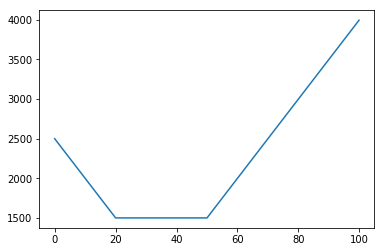

In [8]:
x = torch.arange(0,100,0.1)
xmin=20
xmax=50
y = torch.clamp(50*(x-xmin),min=0)+torch.clamp(50*(xmax-x),min=0)

plt.plot(x.numpy(),y.numpy())

In [5]:
mydict = {
    "a" : [],
    "b" : []
}

mydict["a"].append(12)
mydict["a"].append(12)
mydict["c"].append(12)

print(mydict)

KeyError: 'c'

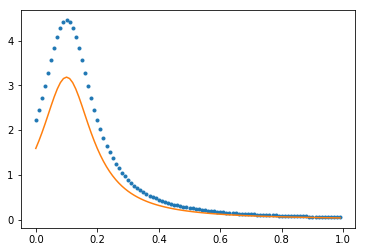

In [6]:
one = torch.ones(1)
d1 = UnitCauchy(loc=0.1*one,scale=0.1*one)
d2 = dist.Cauchy(loc=0.1*one,scale=0.1*one)

x = torch.arange(0,1,0.01)
p1 = torch.exp(d1.log_prob(x))
p2 = torch.exp(d2.log_prob(x))

plt.plot(x.numpy(),p1.numpy(),'.')
plt.plot(x.numpy(),p2.numpy(),'-')

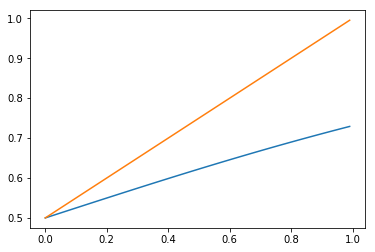

In [4]:
def rescale1(x):
    tmp = np.exp(x)
    return tmp/(1.0+tmp)
        
def rescale2(x):
    return 0.5*(1+x)

x = np.arange(0.0,1.0,0.01)
y1 = rescale1(x)
y2 = rescale2(x)
plt.plot(x,y1)
plt.plot(x,y2)


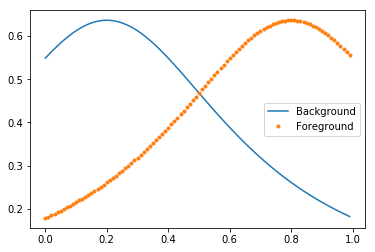

In [7]:
from LOW_LEVEL_UTILITIES.utilities import Exp_shift_scale,Normal,Cauchy

x = np.arange(0.0,1.0,0.01)
y1 = Cauchy(x,0.2,0.5)
y2 = Cauchy(x,0.8,0.5)

#plt.yscale('log')
plt.plot(x,y1,'-')
plt.plot(x,y2,'.')
plt.legend(["Background","Foreground"])

In [45]:
print(np.log(2.0))

0.6931471805599453


In [46]:
a = None
if(a):
    print("ciao")

0.060205999132796235 0.5
0.5623413251903491


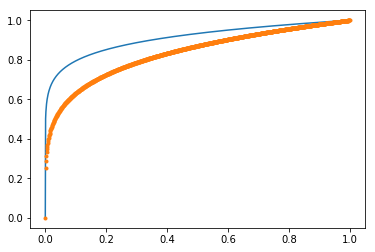

In [48]:
def f(x):
    return x**(0.05)

p_min = 1E-5
alpha = - np.log(2.0)/np.log(p_min)

print(alpha,p_min**alpha)

print(f(1E-5))

#plt.xscale('log')
x = np.arange(0,1,0.001)
y1 = x**0.1
y2 = x**0.2


plt.plot(x,y1,'-')
plt.plot(x,y2,'.')

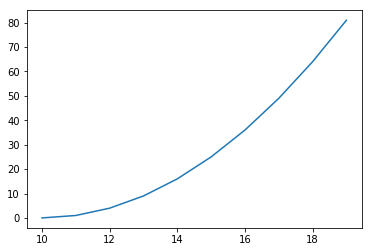

In [24]:
lcoeff=1
vmask = 10 
f = np.arange(1,2,0.1)
vbox = vmask*f

y = lcoeff*(vbox-vmask)**2

plt.plot(vbox,y)

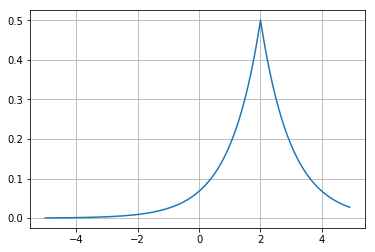

In [2]:
d = Exp_shift_rate(shift=2.0,rate=1)
x = torch.arange(-5,5,0.1)
y = torch.exp(d.log_prob(x))

#plt.yscale('log')
plt.plot(x.numpy(),y.numpy())
plt.grid()

In [3]:
import scipy.integrate as integrate
import scipy.special as special
rate=4.5
shift=2.3
norm   = integrate.quad(lambda x: 0.5*rate*np.exp(-rate*np.abs(x-shift)), -100, 100)
av     = integrate.quad(lambda x: x*0.5*rate*np.exp(-rate*np.abs(x-shift)), -100, 100)
sigma2 = integrate.quad(lambda x: (x-shift)**2*0.5*rate*np.exp(-rate*np.abs(x-shift)), -100, 100)
print(norm,"-->",1)
print(av,"--->",shift)
print(sigma2,"--->",2/rate**2)

(0.9999999999681324, 1.1741505548558698e-09) --> 1
(2.2999999999267042, 8.534118600715283e-09) ---> 2.3
(0.09876543209530703, 5.586975254437975e-10) ---> 0.09876543209876543


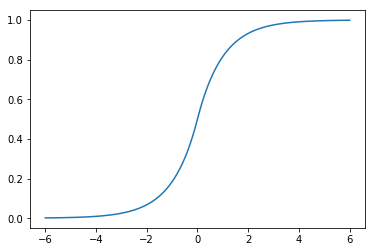

In [4]:
x = torch.arange(-3,9.1,0.1).float()
d = Exp_shift_rate(shift=3.0,rate=1)
y = d.cdf(x)
plt.plot((x-3.0).numpy(),y.numpy())

tensor([-3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000, -2.4000, -2.3000,
        -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000, -1.6000, -1.5000,
        -1.4000, -1.3000, -1.2000, -1.1000, -1.0000, -0.9000, -0.8000, -0.7000,
        -0.6000, -0.5000, -0.4000, -0.3000, -0.2000, -0.1000,  0.0000,  0.1000,
         0.2000,  0.3000,  0.4000,  0.5000,  0.6000,  0.7000,  0.8000,  0.9000,
         1.0000,  1.1000,  1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,
         1.8000,  1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000,  3.0000,  3.1000,  3.2000,  3.3000,
         3.4000,  3.5000,  3.6000,  3.7000,  3.8000,  3.9000,  4.0000,  4.1000,
         4.2000,  4.3000,  4.4000,  4.5000,  4.6000,  4.7000,  4.8000,  4.9000,
         5.0000,  5.1000,  5.2000,  5.3000,  5.4000,  5.5000,  5.6000,  5.7000,
         5.8000,  5.9000,  6.0000,  6.1000,  6.2000,  6.3000,  6.4000,  6.5000,
         6.6000,  6.7000,  6.8000,  6.90

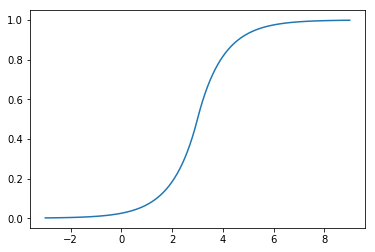

In [5]:
x2 = d.icdf(y)
print(x2)
plt.plot(x2.numpy(),y.numpy())

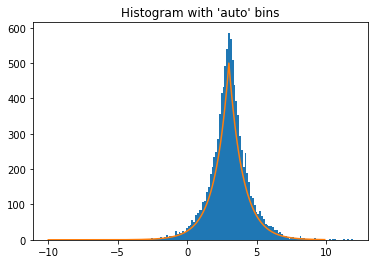

In [6]:
nsample = 10000
d = Exp_shift_rate(shift=3.0,rate=1)
g = d.sample([nsample])

x = torch.arange(-10,10,0.1)
y = 0.1*nsample*torch.exp(d.log_prob(x))


plt.hist(g.numpy(), bins='auto')  # arguments are passed to np.histogram
plt.plot(x.numpy(),y.numpy())
plt.title("Histogram with 'auto' bins")
plt.show()


#hist = np.histogram(g.numpy(), bins=10, range=None, normed=None, weights=None, density=None)

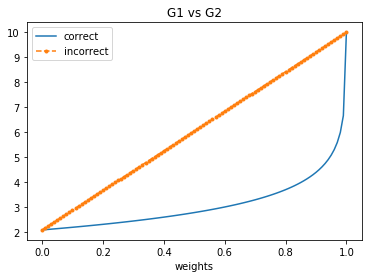

In [7]:
w = torch.arange(0,1.01,0.01)

log_pa  = torch.tensor([-10.0])
log_pb  = torch.tensor([-2.1])
log_w   = torch.log(w)
log_1mw = get_log_prob_compl(log_w)

logp_correct = Log_Add_Exp(log_pa,log_pb,log_w,log_1mw)


logp_incorrect = w*log_pa + (1-w)*log_pb

#plt.yscale('log')
plt.title("G1 vs G2")
plt.xlabel('weights')
plt.plot(w.numpy(),-logp_correct.numpy(),'-')
plt.plot(w.numpy(),-logp_incorrect.numpy(),'.--')
plt.legend(["correct","incorrect"])
mp.savefig("/home/ldalessi/spacetx-research/incremental_steps/ARCHIVE/LogSumExp.png")
        
        

#log_w   = torch.log(putative_masks)
#log_1mw = get_log_prob_compl(log_w)
#log_partial_pixel1 = Log_Add_Exp(log_p_given_fg1,log_p_given_bg,log_w,log_1mw)
#log_partial_pixel2 = Log_Add_Exp(log_p_given_fg2,log_p_given_bg,log_w,log_1mw)
                
                

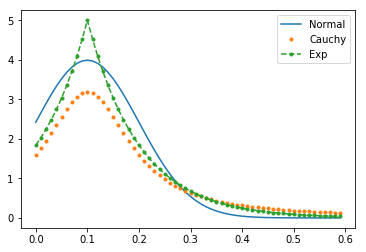

In [9]:
from LOW_LEVEL_UTILITIES.utilities import Exp_shift_scale,Normal,Cauchy

x = np.arange(0.0,0.6,0.01)
y1 = Normal(x,0.1,0.1)
y2 = Cauchy(x,0.1,0.1)
y3 = Exp_shift_scale(x,0.1,0.1)
#plt.yscale('log')
plt.plot(x,y1,'-')
plt.plot(x,y2,'.')
plt.plot(x,y3,'.--')
plt.legend(["Normal","Cauchy","Exp"])

mp.savefig("/home/ldalessi/spacetx-research/incremental_steps/ARCHIVE/compare_dist.png")